In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("Student_Satisfaction_Survey.csv", encoding="ISO-8859-1")
df.head()

,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
3,4,1,12,The teachers approach to teaching can best be...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY


In [4]:
df.isnull().sum()

SN                      0
Total Feedback Given    0
Total Configured        0
Questions               0
Weightage 1             0
Weightage 2             0
Weightage 3             0
Weightage 4             0
Weightage 5             0
Average/ Percentage     0
Course Name             0
Basic Course            0
dtype: int64

In [5]:
df.info

<bound method DataFrame.info of      SN  Total Feedback Given  Total Configured  \
0     1                     1                12   
1     2                     1                12   
2     3                     1                12   
3     4                     1                12   
4     5                     1                12   
..   ..                   ...               ...   
575  16                     9               170   
576  17                     9               170   
577  18                     9               170   
578  19                     9               170   
579  20                     9               170   

                                             Questions  Weightage 1  \
0    How much of the syllabus was covered in the cl...            0   
1    How well did the teachers prepare for the clas...            0   
2      How well were the teachers able to communicate?            0   
3    The teachers approach to teaching can best be...            0   


In [6]:
# Unique values in "Questions"
print(df["Questions"].unique())

# Average feedback score distribution
df["Average/ Percentage"].value_counts().head()


['How much of the syllabus was covered in the class?'
 'How well did the teachers prepare for the classes?'
 'How well were the teachers able to communicate?'
 'The teacher\x92s approach to teaching can best be described as'
 'Fairness of the internal evaluation process by the teachers.'
 'Was your performance in assignments discussed with you?'
 'The institute takes an active interest in promoting internships, student exchange, field visit opportunities for students.'
 'The teaching and mentoring process in your institution facilitates you in cognitive, social and\nemotional growth.'
 'The institution provides multiple opportunities to learn and grow.'
 'Teachers inform you about your expected competencies, course outcomes and program\noutcomes.'
 'Your mentor does a necessary follow-up with an assigned task to you.'
 'The teachers illustrate the concepts through examples and applications.'
 'The teachers identify your strengths and encourage you to provide the proper level of challen

Average/ Percentage
4.00 / 80.00     59
3.00 / 60.00     38
5.00 / 100.00    34
4.50 / 90.00     22
3.50 / 70.00     21
Name: count, dtype: int64

In [11]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [12]:
sid = SentimentIntensityAnalyzer()

In [13]:
scores = df['Questions'].apply(lambda text: sid.polarity_scores(str(text)))
df = pd.concat([df, scores.apply(pd.Series)], axis=1)  # adds columns pos, neu, neg, compound

In [14]:
# Classify sentiment based on the compound score
def classify_sentiment(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['compound'].apply(classify_sentiment)


In [15]:
# Display the first few entries with their sentiment scores and labels
print(df[['Questions', 'pos', 'neu', 'neg', 'compound', 'sentiment']].head())

                                           Questions    pos    neu  neg  \
0  How much of the syllabus was covered in the cl...  0.000  1.000  0.0   
1  How well did the teachers prepare for the clas...  0.208  0.792  0.0   
2    How well were the teachers able to communicate?  0.231  0.769  0.0   
3  The teachers approach to teaching can best be...  0.318  0.682  0.0   
4  Fairness of the internal evaluation process by...  0.000  1.000  0.0   

   compound sentiment  
0    0.0000   Neutral  
1    0.2732  Positive  
2    0.2732  Positive  
3    0.6369  Positive  
4    0.0000   Neutral  


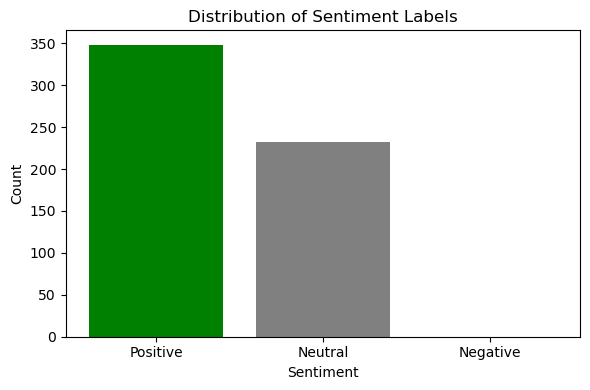

In [16]:
import matplotlib.pyplot as plt

# Count the number of questions in each sentiment category
sentiment_counts = df['sentiment'].value_counts().reindex(['Positive','Neutral','Negative'], fill_value=0)

# Plot a bar chart of sentiment distribution
plt.figure(figsize=(6,4))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'gray', 'red'])
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
